# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 살펴보고자 합니다.
* 행은 자사 매장이 있는 각 지역별 데이터 입니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 불러오기

In [3]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 각 지역 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 각 지역 소득수준(단위 : 천달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	Education 	|	 교육수준(10~18), 범주	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(Yes, No)	|	feature	|


## 1.데이터 살펴보기

* 주어진 데이터로부터 다양한 조회 방법을 통해 비즈니스 사항을 파악해 봅시다.
* 데이터와 비즈니스를 파악하기 위한 질문을 10개 이상 도출하고, 조회해 봅시다.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


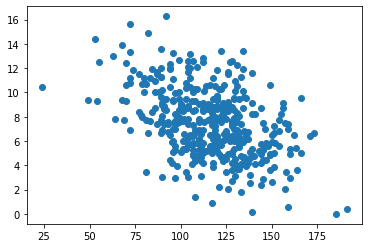

In [8]:
plt.scatter(data.Price, data.Sales)
plt.show()

In [4]:
data.loc[data['Sales'] > 10]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
368,10.71,109,22,10,348,79,Good,74,14,No,Yes
369,10.26,135,100,22,463,122,Medium,36,14,Yes,Yes
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes
384,12.85,123,37,15,348,112,Good,28,12,Yes,Yes


In [5]:
test = pd.read_csv('https://bit.ly/3HaMAtZ')
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.00,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.00,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.00,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.00,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.00,0,0,8.0500,S,Age31_40,1,0.434531
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Age21_30,1,0.334004
887,1,1,female,19.00,0,0,30.0000,S,Age11_20,1,0.233476
888,0,3,female,21.77,1,2,23.4500,S,Age21_30,4,0.268283
889,1,1,male,26.00,0,0,30.0000,C,Age21_30,1,0.321438


In [7]:
test.groupby(by=['Embarked','Pclass'])['Age'].median()

Embarked  Pclass
C         1         35.90
          2         27.00
          3         27.75
Q         1         38.50
          2         30.00
          3         27.00
S         1         35.90
          2         30.00
          3         26.00
Name: Age, dtype: float64

In [10]:
a = np.array([[11, 12, 13, 14], [15, 16, 17, 18], [19, 20, 21, 22]])
a

array([[11, 12, 13, 14],
       [15, 16, 17, 18],
       [19, 20, 21, 22]])

In [11]:
a[1:3, 1:3]

array([[16, 17],
       [20, 21]])

In [12]:
a[1:, 1:3]

array([[16, 17],
       [20, 21]])

In [13]:
a[-2:, -3:-1]

array([[16, 17],
       [20, 21]])

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   AgeGroup    891 non-null    object 
 9   Family      891 non-null    int64  
 10  Age_scale1  891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [16]:
test = pd.read_csv('https://bit.ly/3HaMAtZ')
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.00,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.00,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.00,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.00,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.00,0,0,8.0500,S,Age31_40,1,0.434531
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Age21_30,1,0.334004
887,1,1,female,19.00,0,0,30.0000,S,Age11_20,1,0.233476
888,0,3,female,21.77,1,2,23.4500,S,Age21_30,4,0.268283
889,1,1,male,26.00,0,0,30.0000,C,Age21_30,1,0.321438


In [17]:
test.groupby(by=['Pclass','Sex'])[['Age']].mean()

Age
Pclass Sex              
1      female  34.584787
       male    39.826393
2      female  28.540000
       male    30.876481
3      female  22.638958
       male    27.775216

In [19]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
a.shape

(2, 3)